In [24]:
import os
import pandas as pd
import numpy as np

# for plotting graph
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [3]:
os.listdir('performance/')

['Adaboost Evaluation.csv',
 'Gradient Boosting Evaluation.csv',
 'LogReg Evaluation.csv',
 'Naive Bayes Evaluation.csv',
 'RandomForest Evaluation.csv',
 'XGBoost Evaluation.csv']

In [5]:
model_performance = pd.DataFrame()
for file in os.listdir('performance/'):
    model = pd.read_csv(f'performance/{file}')
    model_performance = pd.concat([model_performance, model])

In [9]:
model_performance = model_performance.reset_index(drop=True)

In [15]:
model_performance.loc[len(model_performance)] = ['Tuned LSTM accuracy', 0.921953, 0.792986, 0.683542, 0.720049, 0.276350, 0.982305]
model_performance.loc[len(model_performance)] = ['Tuned LSTM validation accuracy', 0.919935, 0.750007, 0.678254, 0.704125, 0.283618, 0.980096]
model_performance.loc[len(model_performance)] = ['Baseline Bidirectional LSTM', 0.921439, 0.790875, 0.665504, 0.716071, 0.280973, 0.978993]
model_performance.loc[len(model_performance)] = ['Baseline Bidirectional LSTM with GloVe', 0.921446, 0.793082, 0.703322, 0.738091, 0.274437, 0.982339]
model_performance.loc[len(model_performance)] = ['Baseline Bidirectional LSTM with CNN', 0.922762, 0.817787, 0.665306, 0.725218, 0.275093, 0.981135]

In [18]:
model_performance.loc[len(model_performance)] = ['Ensemble 1 (XGBoost, LGBM, AdaBoost) equal weights', 0.913405, 0.752546, 0.665089, 0.701674, 1.368523, 0.825564]
model_performance.loc[len(model_performance)] = ['Ensemble 2 (XGBoost, LGBM, AdaBoost) diff weights', 0.913418, 0.752405, 0.665546, 0.701919, 1.367190, 0.825780]
model_performance.loc[len(model_performance)] = ['Ensemble 3 (XGBoost, LGBM, RandomForest) equal weights', 0.909626, 0.716370, 0.706887, 0.710007, 1.180893, 0.844709]
model_performance.loc[len(model_performance)] = ['Ensemble 4 (XGBoost, LGBM, RandomForest) diff weights', 0.910980, 0.727832, 0.694321, 0.708613, 1.239876, 0.839007]

In [19]:
model_performance

,model name,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,Adaboost with BinaryRelevance,0.911212,0.765606,0.597400,0.669831,0.387925,0.963709
1,Adaboost with ClassifierChain,0.912879,0.739322,0.631241,0.675326,0.384332,0.961191
2,Adaboost with LabelPowerset,0.907634,0.647453,0.559887,0.584543,0.350682,0.725613
3,LightGBM with BinaryRelevance,0.911532,0.764517,0.630639,0.689467,0.305640,0.969250
4,LightGBM with ClassifierChain,0.910855,0.750108,0.641836,0.689463,0.331201,0.965936
5,LightGBM with LabelPowerset,0.819221,0.283707,0.195029,0.175680,1.608485,0.568145
6,Tuned LightGBM with BinaryRelevance,0.913756,0.771878,0.627554,0.690020,0.296583,0.969507
7,LogReg with BinaryRelevance,0.780950,0.378367,0.868125,0.516253,0.356478,0.954557
8,LogReg with ClassifierChain,0.797708,0.324430,0.895209,0.457118,0.373317,0.950068
9,LogReg with LabelPowerset,0.540913,0.260673,0.635187,0.353004,0.337478,0.893793


In [34]:
model_performance.to_csv('Combined Evaluation.csv', index=False)

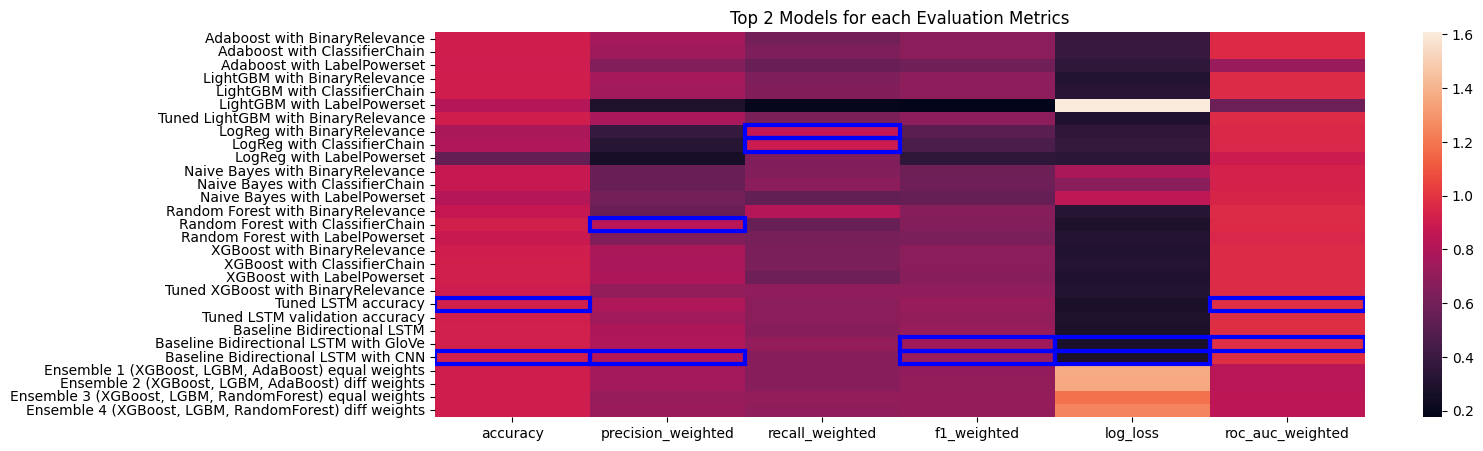

In [33]:
# identify the best 2 models for each evaluation score
model_performance_score = model_performance.drop('model name', axis=1)
fig,ax = plt.subplots(figsize=(15, 5), facecolor='w', edgecolor='k')
ax = sns.heatmap(model_performance_score, yticklabels=model_performance['model name'])
column_best = model_performance_score.idxmax(axis=0)
column_second_best = model_performance_score.replace(model_performance_score.max(), model_performance_score.min()).idxmax()

column_best['log_loss'] = model_performance['log_loss'].idxmin(axis=0)
column_second_best['log_loss'] = model_performance_score.replace(model_performance_score.min(), model_performance_score.max()).idxmin()['log_loss']

for col, variable in enumerate(model_performance.columns[1:]):
    position = model_performance.index.get_loc(column_best[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='blue', lw=3))
    
    position_second = model_performance.index.get_loc(column_second_best[variable])
    ax.add_patch(Rectangle((col, position_second),1,1, fill=False, edgecolor='blue', lw=3))
ax.set_title('Top 2 Models for each Evaluation Metrics')
plt.show()

In [5]:
model_performance = pd.read_csv('performance\Combined Evaluation.csv')
model_performance

,model name,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,Adaboost with BinaryRelevance,0.911212,0.765606,0.597400,0.669831,0.387925,0.963709
1,Adaboost with ClassifierChain,0.912879,0.739322,0.631241,0.675326,0.384332,0.961191
2,Adaboost with LabelPowerset,0.907634,0.647453,0.559887,0.584543,0.350682,0.725613
3,LightGBM with BinaryRelevance,0.911532,0.764517,0.630639,0.689467,0.305640,0.969250
4,LightGBM with ClassifierChain,0.910855,0.750108,0.641836,0.689463,0.331201,0.965936
5,LightGBM with LabelPowerset,0.819221,0.283707,0.195029,0.175680,1.608485,0.568145
6,Tuned LightGBM with BinaryRelevance,0.913756,0.771878,0.627554,0.690020,0.296583,0.969507
7,LogReg with BinaryRelevance,0.780950,0.378367,0.868125,0.516253,0.356478,0.954557
8,LogReg with ClassifierChain,0.797708,0.324430,0.895209,0.457118,0.373317,0.950068
9,LogReg with LabelPowerset,0.540913,0.260673,0.635187,0.353004,0.337478,0.893793


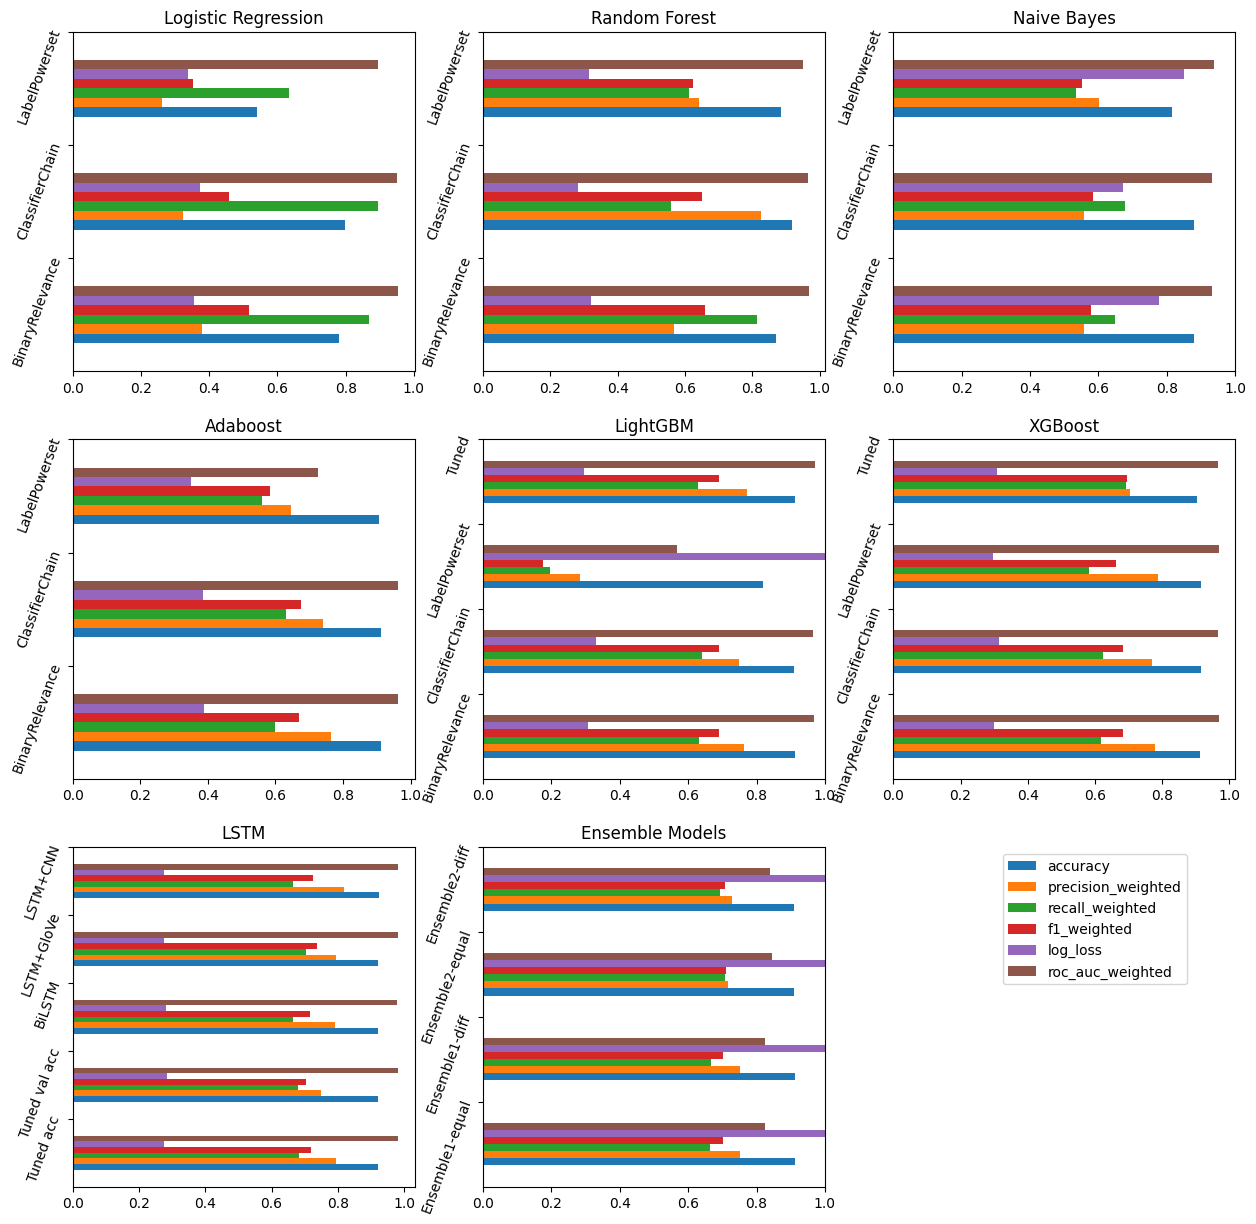

In [73]:
fig, axes = plt.subplots(nrows = 3, ncols=3, figsize=(15,15))
# Logistic Regression
model_performance.loc[7:9].plot(x="model name", 
                                y=model_performance.columns[1:].tolist(), 
                                kind="barh", rot=70, ax=axes[0, 0], legend=None)
axes[0, 0].set_ylabel(None)
axes[0, 0].set_yticks(np.arange(3)+0.5, ['BinaryRelevance', 'ClassifierChain', 'LabelPowerset'])
axes[0, 0].set_title('Logistic Regression')
# Random Forest
model_performance.loc[13:15].plot(x="model name", 
                                y=model_performance.columns[1:].tolist(), 
                                kind="barh", rot=70, ax=axes[0, 1], legend=None)
axes[0, 1].set_ylabel(None)
axes[0, 1].set_yticks(np.arange(3)+0.5, ['BinaryRelevance', 'ClassifierChain', 'LabelPowerset'])
axes[0, 1].set_title('Random Forest')

# Naive Bayes
model_performance.loc[10:12].plot(x="model name", 
                                y=model_performance.columns[1:].tolist(), 
                                kind="barh", rot=70, ax=axes[0, 2], legend=None)
axes[0, 2].set_ylabel(None)
axes[0, 2].set_yticks(np.arange(3)+0.5, ['BinaryRelevance', 'ClassifierChain', 'LabelPowerset'])
axes[0, 2].set_title('Naive Bayes')
axes[0, 2].set_xlim(0, 1)

# Adaboost
model_performance.loc[0:2].plot(x="model name", 
                                y=model_performance.columns[1:].tolist(), 
                                kind="barh", rot=70, ax=axes[1, 0], legend=None)
axes[1, 0].set_ylabel(None)
axes[1, 0].set_yticks(np.arange(3)+0.5, ['BinaryRelevance', 'ClassifierChain', 'LabelPowerset'])
axes[1, 0].set_title('Adaboost')

# LightGBM
model_performance.loc[3:6].plot(x="model name", 
                                y=model_performance.columns[1:].tolist(), 
                                kind="barh", rot=70, ax=axes[1, 1], legend=None)
axes[1, 1].set_ylabel(None)
axes[1, 1].set_yticks(np.arange(4)+0.5, ['BinaryRelevance', 'ClassifierChain', 'LabelPowerset', 'Tuned'])
axes[1, 1].set_title('LightGBM')
axes[1, 1].set_xlim(0, 1)

# XGBoost
model_performance.loc[16:19].plot(x="model name", 
                                y=model_performance.columns[1:].tolist(), 
                                kind="barh", rot=70, ax=axes[1, 2], legend=None)
axes[1, 2].set_ylabel(None)
axes[1, 2].set_yticks(np.arange(4)+0.5, ['BinaryRelevance', 'ClassifierChain', 'LabelPowerset', 'Tuned'])
axes[1, 2].set_title('XGBoost')

# LSTM
model_performance.loc[20:24].plot(x="model name", 
                                y=model_performance.columns[1:].tolist(), 
                                kind="barh", rot=70, ax=axes[2, 0], legend=None)
axes[2, 0].set_ylabel(None)
axes[2, 0].set_yticks(np.arange(5)+0.5, ['Tuned acc', 'Tuned val acc', 'BiLSTM', 'LSTM+GloVe', 'LSTM+CNN'])
axes[2, 0].set_title('LSTM')

# Ensemble
model_performance.loc[25:28].plot(x="model name", 
                                y=model_performance.columns[1:].tolist(), 
                                kind="barh", rot=70, ax=axes[2, 1])
axes[2, 1].set_ylabel(None)
axes[2, 1].set_yticks(np.arange(4)+0.5, ['Ensemble1-equal', 'Ensemble1-diff', 'Ensemble2-equal', 'Ensemble2-diff'])
axes[2, 1].set_title('Ensemble Models')
axes[2, 1].set_xlim(0, 1)
axes[2, 1].legend(bbox_to_anchor=(1.5, 1))

fig.delaxes(axes[2][2])
plt.show()